# Display of Satellite Trajectories

Below is a 2D projection of the simulated satellite orbit trajectories.  The objective was to get the satellites to cross paths, which is demonstrated by the dashed trajectory lines and the satellites represented by the circular markers.

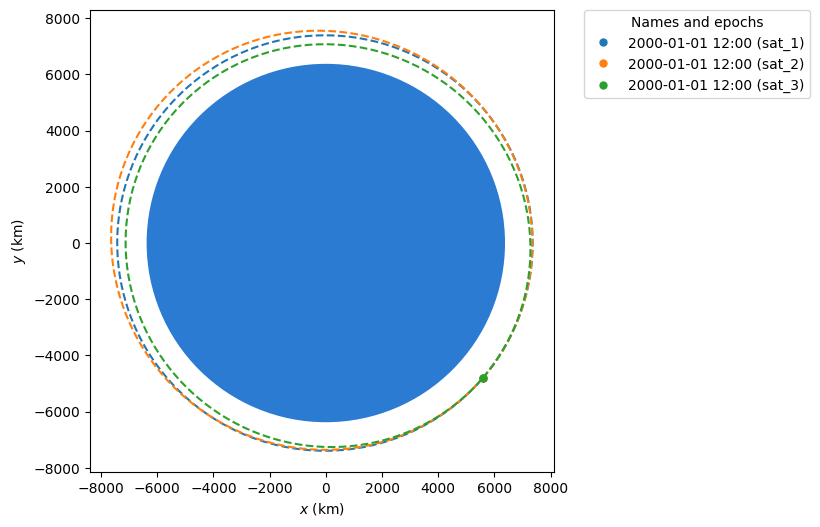

In [4]:
# import the simulation calculator to plot the orbits
from poliastro.plotting import StaticOrbitPlotter

from data_generation.simulate_orbits import get_cached_satellites
import plotly.io as pio

pio.renderers.default = "notebook_connected"
satellites = get_cached_satellites()
static_plot = StaticOrbitPlotter()
for sat in satellites:
    static_plot.plot(orbit=sat.orbit, label=sat.name)

# Pre-Processing and Data Preview

2022-12-01 04:28:11,020 - cs6840_final_project - INFO - Loading Satellite Simulated States ...
2022-12-01 04:28:11,024 - cs6840_final_project - INFO - Finished Satellite Simulation load.


  satellite_id radar_id  time_rel_s        x_km         y_km         z_km
0        sat_1  radar_1   10.000000  633.321711 -5363.930987  5014.454006
1        sat_1  radar_1   10.005005  633.127425 -5362.304441  5012.983412
2        sat_1  radar_1   10.010010  633.225240 -5363.151863  5013.825616
3        sat_1  radar_1   10.015015  633.128131 -5362.348358  5013.124427
4        sat_1  radar_2   10.020020  632.900068 -5360.435713  5011.386305


        time_rel_s         x_km         y_km         z_km
count  3000.000000  3000.000000  3000.000000  3000.000000
mean     12.500000   631.079652 -5354.205352  5022.489484
std       1.445061     2.604249     8.065200     8.582994
min      10.000000   626.667610 -5374.651893  5000.146205
25%      11.250000   629.331781 -5360.419547  5015.774211
50%      12.500000   630.209829 -5354.327071  5022.429047
75%      13.750000   632.237250 -5348.121667  5029.226351
max      15.000000   639.474429 -5330.217558  5045.998444


<class 'pandas.core.frame.Data

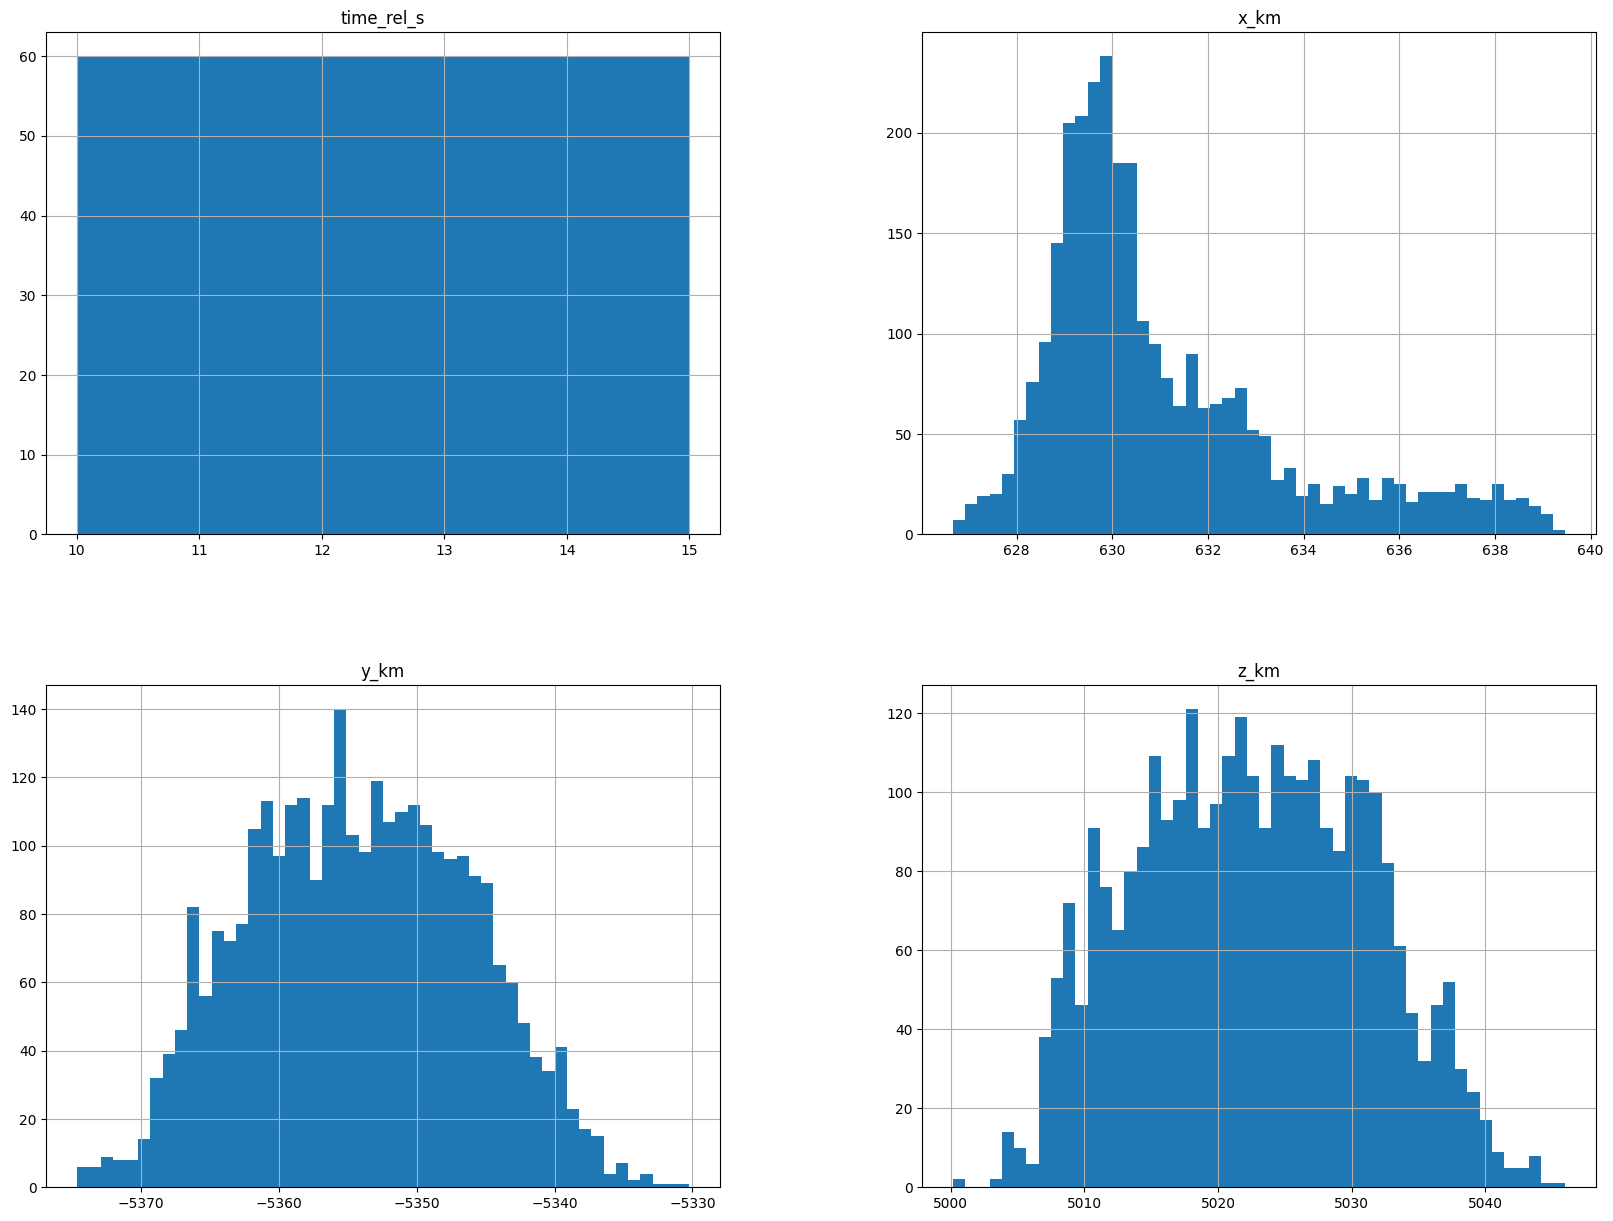

In [1]:
# inspect the corruted simulation dataset
from shallow_learning.pre_process import summarize_dataset

summarize_dataset()

# Application of Shallow Learning Algorithms

## Methods

The `ml_models.learn()` algorithm uses a Voting Ensemble classifier to pick between a Random Forest classifier and a State Vector Machine Classifier.  In addition, the following metrics are computed:
- accuracy
- loss (hinge loss for SVC and log-loss for Random Forest)
- Macro F1 Score
 
## Description of Stratified Fold Experiment

The random forest model often performed comparably to the state vector machine model. margin of performance was typically within a couple percentage points. To properly evaluate the models, a statified fold experiment was performed to assess the model performances over multiple data splits.  The Data was split a total of 10 times.  This also served as a test to see how balanced the simulated dataset was.

## Observations

It appeared that the State Vector Machine Classifier (SVC) model outperformed the Random Forest (RF) model 80% of the time with radar 1 (which had a lower range error).  However, the RF model outperformed the SVC model 100% of the time for radar 2, which was a more erratic subset of data.  This may demonstrate that a RF model outperforms and SVC model for noisier spatial data.  Also note, that the data splits were stratified, which may have also influenced the performance.  Another factor could be the characteristics of the data points about the intersection region.

2022-12-01 02:52:52,907 - cs6840_final_project - INFO - Loaded final model from: C:\working\workspaces\WSU\wsu_venv\Lib\site-packages\cache\final_model_radar_1.pkl
2022-12-01 02:52:52,909 - cs6840_final_project - INFO - Model Fitting complete for subset: radar_1
2022-12-01 02:52:52,915 - cs6840_final_project - INFO - ~~~ Fitting and Analyzing Models for stratified split number: 1 ~~~
2022-12-01 02:52:53,048 - cs6840_final_project - INFO - Optimal Model for radar_1 was: SVC
2022-12-01 02:52:53,168 - cs6840_final_project - INFO - ~~~ END of experiment run: 1
2022-12-01 02:52:53,170 - cs6840_final_project - INFO - ~~~ Fitting and Analyzing Models for stratified split number: 2 ~~~
2022-12-01 02:52:53,320 - cs6840_final_project - INFO - Optimal Model for radar_1 was: SVC
2022-12-01 02:52:53,448 - cs6840_final_project - INFO - ~~~ END of experiment run: 2
2022-12-01 02:52:53,452 - cs6840_final_project - INFO - ~~~ Fitting and Analyzing Models for stratified split number: 3 ~~~
2022-12-01 02

╒════════════════════════════════╤════════════╤═══════════════════════════╤══════════════════╕
│ Classifier                     │   Accuracy │   Loss [hinge-SVC/log-RF] │   Macro F1 Score │
╞════════════════════════════════╪════════════╪═══════════════════════════╪══════════════════╡
│ SVC Averaged Results           │   0.957003 │                  2.20823  │         0.955149 │
├────────────────────────────────┼────────────┼───────────────────────────┼──────────────────┤
│ Random Forest Averaged Results │   0.954723 │                  0.144478 │         0.954316 │
╘════════════════════════════════╧════════════╧═══════════════════════════╧══════════════════╛


2022-12-01 02:52:55,374 - cs6840_final_project - INFO - Loaded final model from: C:\working\workspaces\WSU\wsu_venv\Lib\site-packages\cache\final_model_radar_2.pkl
2022-12-01 02:52:55,377 - cs6840_final_project - INFO - Model Fitting complete for subset: radar_2
2022-12-01 02:52:55,383 - cs6840_final_project - INFO - ~~~ Fitting and Analyzing Models for stratified split number: 1 ~~~
2022-12-01 02:52:55,547 - cs6840_final_project - INFO - Optimal Model for radar_2 was: Random Forest
2022-12-01 02:52:55,701 - cs6840_final_project - INFO - ~~~ END of experiment run: 1
2022-12-01 02:52:55,705 - cs6840_final_project - INFO - ~~~ Fitting and Analyzing Models for stratified split number: 2 ~~~
2022-12-01 02:52:55,860 - cs6840_final_project - INFO - Optimal Model for radar_2 was: Random Forest
2022-12-01 02:52:55,966 - cs6840_final_project - INFO - ~~~ END of experiment run: 2
2022-12-01 02:52:55,969 - cs6840_final_project - INFO - ~~~ Fitting and Analyzing Models for stratified split number:

╒════════════════════════════════╤════════════╤═══════════════════════════╤══════════════════╕
│ Classifier                     │   Accuracy │   Loss [hinge-SVC/log-RF] │   Macro F1 Score │
╞════════════════════════════════╪════════════╪═══════════════════════════╪══════════════════╡
│ SVC Averaged Results           │   0.729932 │                  1.56781  │         0.729149 │
├────────────────────────────────┼────────────┼───────────────────────────┼──────────────────┤
│ Random Forest Averaged Results │   0.820408 │                  0.451506 │         0.739028 │
╘════════════════════════════════╧════════════╧═══════════════════════════╧══════════════════╛
╒════════════════════════╤═══════════════════════╕
│ Experiment:            │ radar_1               │
╞════════════════════════╪═══════════════════════╡
│ Total Times SVC Chosen │ Total Times RF Chosen │
├────────────────────────┼───────────────────────┤
│ 8                      │ 2                     │
╘════════════════════════╧═══

2022-12-01 02:52:58,450 - cs6840_final_project - INFO - Loaded results from : C:\working\workspaces\WSU\wsu_venv\Lib\site-packages\cache\satellite_fusion_results.pkl
2022-12-01 02:52:58,455 - cs6840_final_project - INFO - Fused Model Accuracy: 98.13%


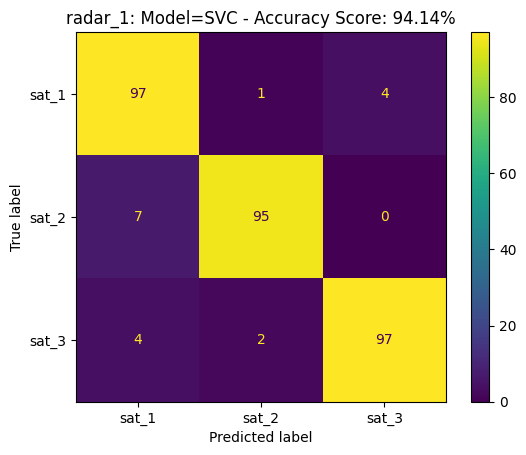

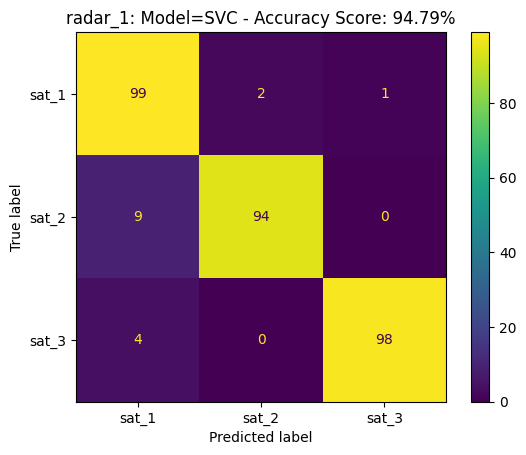

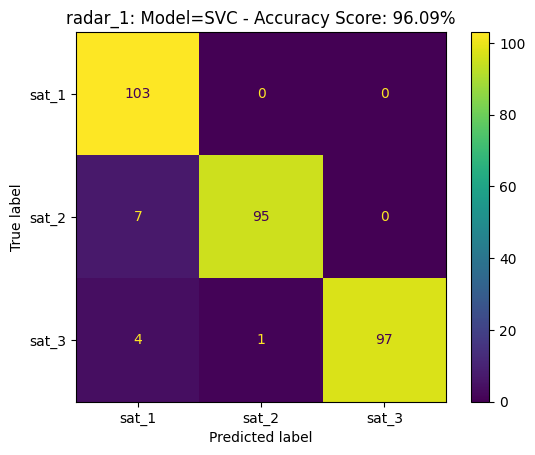

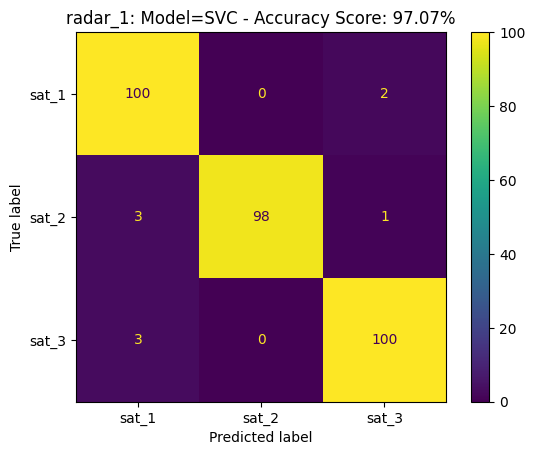

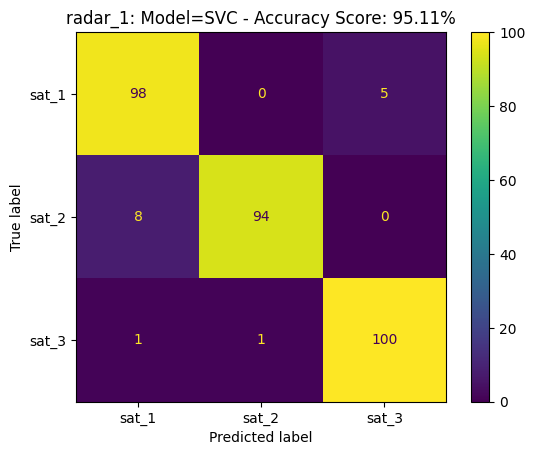

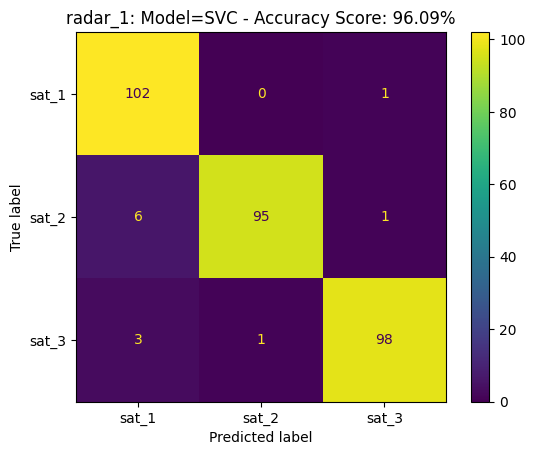

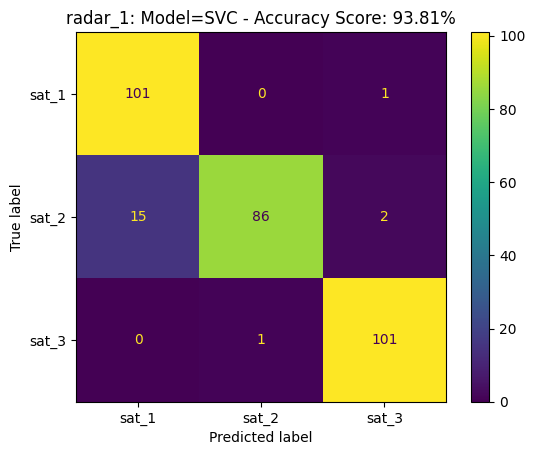

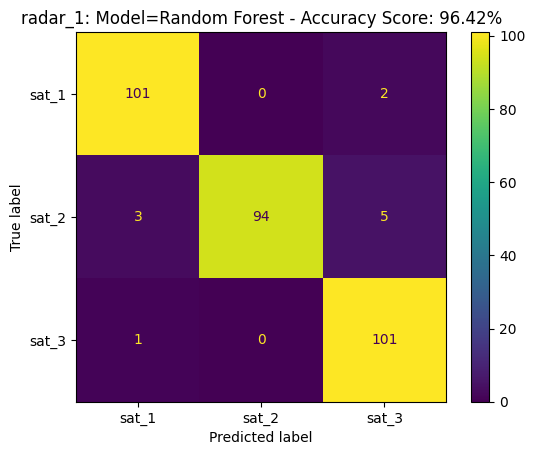

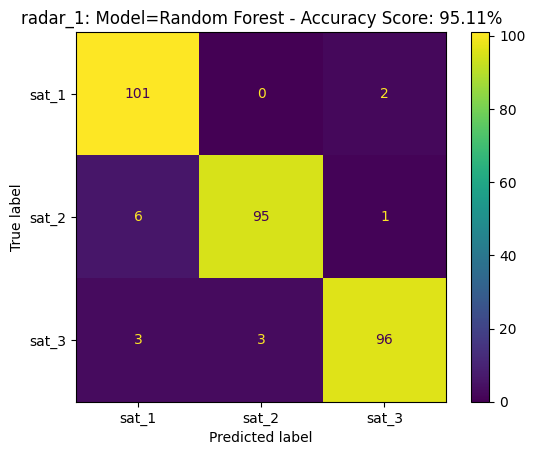

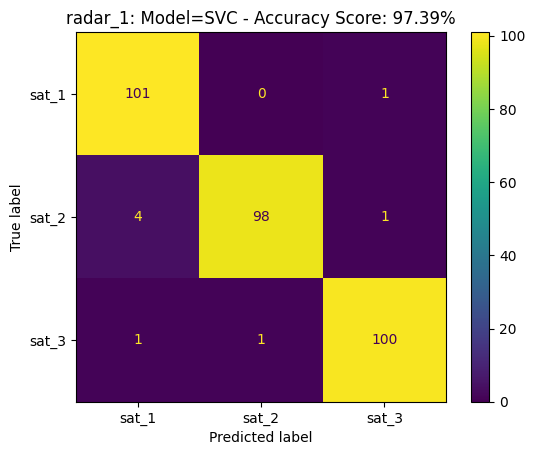

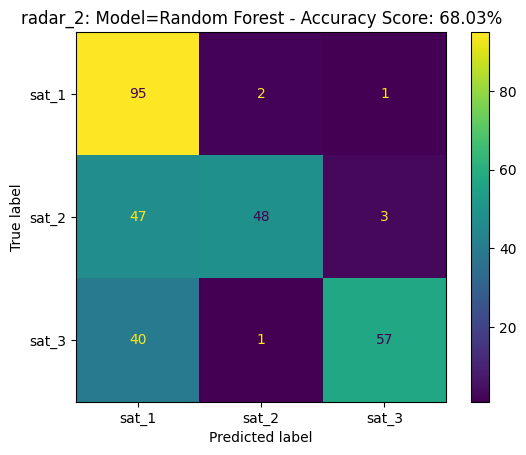

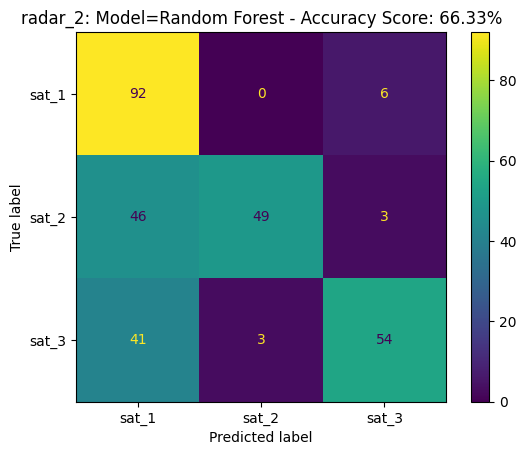

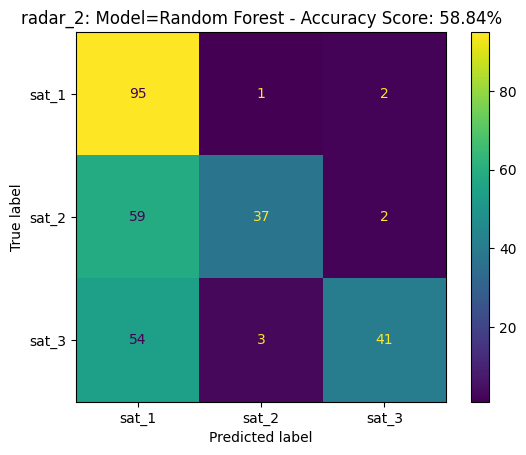

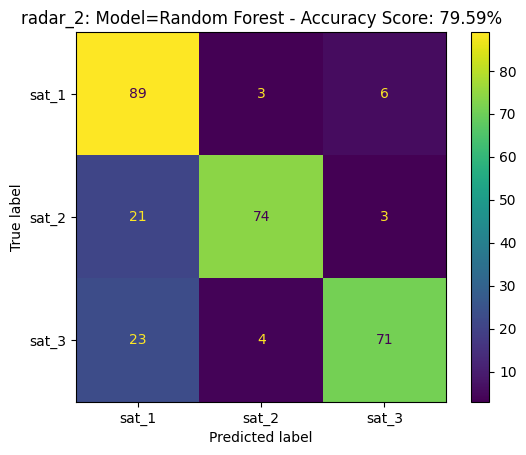

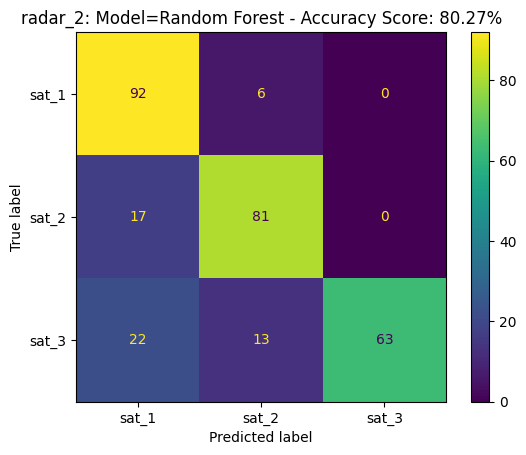

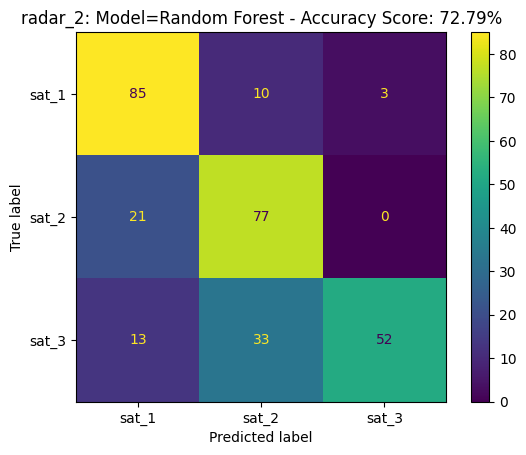

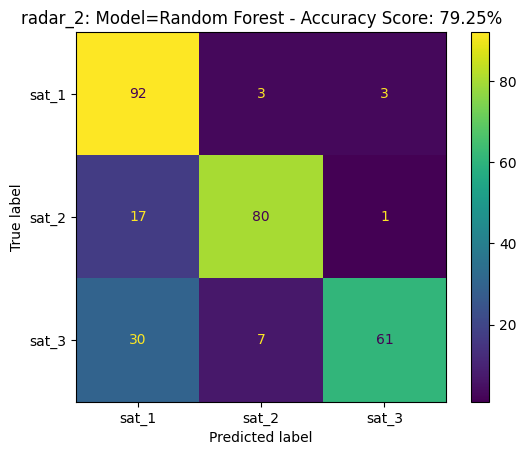

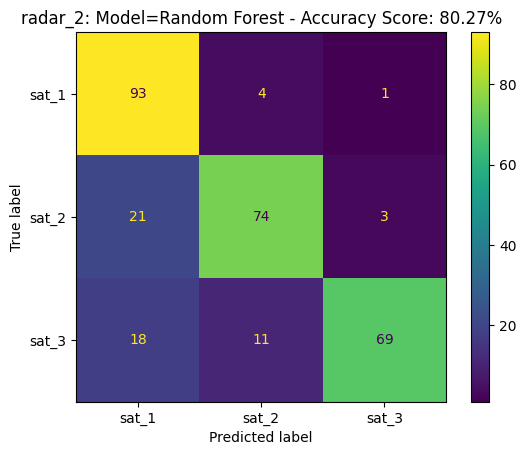

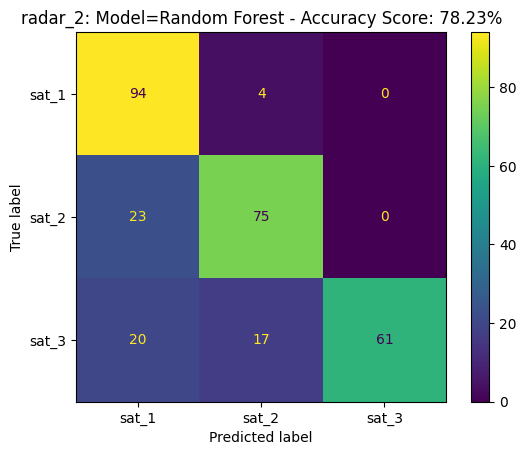

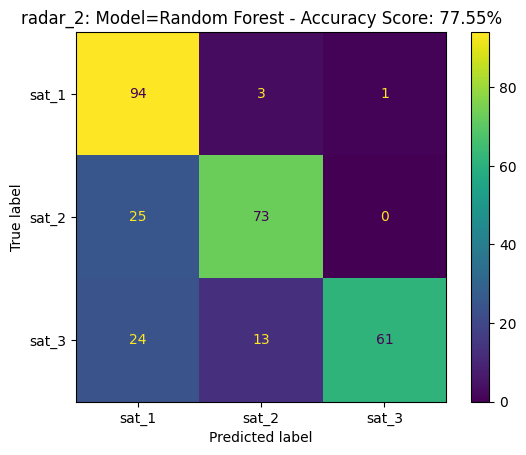

In [2]:
# apply the machine learning SVC/RF ensemble Voting algorithm
from shallow_learning import ml_models
ml_models.__SHOW_PLOTS__ = [False]

results, classifications = ml_models.learn()

# Final Classification Results

## Description
The code below used the voting classifier ensemble model that was fitted on a single `train_test_split`.  This model voted on whichever classifier outperformed the other for the single randomized train/test split.  The results were summarized in tables, and the final two confusion matrices for each radar were plotted.

## Observations
In the non-stratified case, the SVC model outperformed the RF model for both radars, but only by a small margin.  Given that RF models require less computational overhead, it could be a better model, depending on how imperative performance is to the application.

2022-12-01 02:53:19,715 - cs6840_final_project - INFO - Optimal Model for radar_1 was: SVC


╒═══════════════╤════════════╤═══════════════════════════╤══════════════════╕
│ Classifier    │   Accuracy │   Loss [hinge-SVC/log-RF] │   Macro F1 Score │
╞═══════════════╪════════════╪═══════════════════════════╪══════════════════╡
│ SVC           │   0.970684 │                  1.75211  │         0.96994  │
├───────────────┼────────────┼───────────────────────────┼──────────────────┤
│ Random Forest │   0.970684 │                  0.123589 │         0.969483 │
╘═══════════════╧════════════╧═══════════════════════════╧══════════════════╛


2022-12-01 02:53:20,114 - cs6840_final_project - INFO - Optimal Model for radar_2 was: SVC


╒═══════════════╤════════════╤═══════════════════════════╤══════════════════╕
│ Classifier    │   Accuracy │   Loss [hinge-SVC/log-RF] │   Macro F1 Score │
╞═══════════════╪════════════╪═══════════════════════════╪══════════════════╡
│ SVC           │   0.935374 │                  2.22855  │         0.926926 │
├───────────────┼────────────┼───────────────────────────┼──────────────────┤
│ Random Forest │   0.911565 │                  0.235218 │         0.909554 │
╘═══════════════╧════════════╧═══════════════════════════╧══════════════════╛


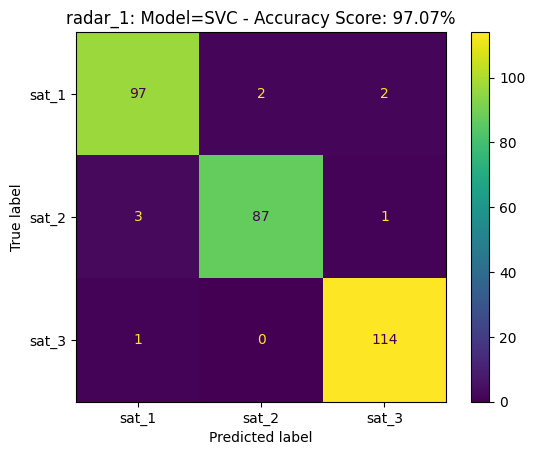

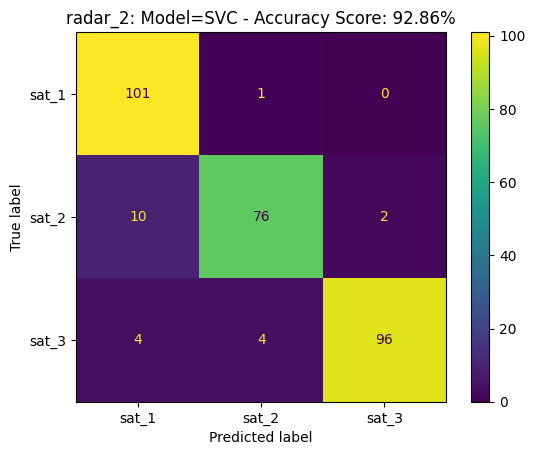

In [4]:
# do the actual analysis of the results
ml_models.final_result_analysis(results, classifications)

# Visulization

The datasets were plotted using the `plotly` library.  The figures below can be described as:

1. The raw, combination of radar corrupted tracks.  The different colors represent the different satellite objects, and the marker symbols represent the different radars.

2. The observation distances to the centroid.  To better understand spatially where the intersection region was located, the distances from each point to the centroid (mean across each dimension) are displayed.

3. The classification results, where the green markers were points correctly associated with the satellite objects and the red markers were points incorrectly associated with the satellite objects.

In [3]:
# plot the results
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

plots = ml_models.generate_plots(results)